In [121]:
try:
    import urllib2 as urllib
except ImportError:
    import urllib as urllib

from __future__ import print_function

import pandas as pd
import zipfile
import os
import geopandas as gpd
from sklearn.cluster import KMeans

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Downloading and unpacking Census Bereau Business data for all years 1993-2014:

In [2]:
urls = ['https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp00totals.zip',
        'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp01totals.zip',
        'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp02totals.zip',
        'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp03totals.zip',
        'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp04totals.zip',
        'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp05totals.zip',
        'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp06totals.zip',
        'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp07totals.zip',
        'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp08totals.zip',
        'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp09totals.zip',
        'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp10totals.zip',
        'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp11totals.zip',
        'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp12totals.zip',
        'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp13totals.zip',
        'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp14totals.zip',
        'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp94totals.zip',
        'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp95totals.zip',
        'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp96totals.zip',
        'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp97totals.zip',
        'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp98totals.zip',
        'https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/zbp99totals.zip']

In [4]:
for i in urls:
    urllib.request.urlretrieve(i, 'zbp.zip')
    !unzip -d $PUIDATA/HW12 zbp.zip
    !rm zbp.zip

Archive:  zbp.zip
  inflating: /nfshome/rms818/PUIdata/HW12/zbp00totals.txt  
Archive:  zbp.zip
  inflating: /nfshome/rms818/PUIdata/HW12/zbp01totals.txt  
Archive:  zbp.zip
  inflating: /nfshome/rms818/PUIdata/HW12/zbp02totals.txt  
Archive:  zbp.zip
  inflating: /nfshome/rms818/PUIdata/HW12/zbp03totals.txt  
Archive:  zbp.zip
  inflating: /nfshome/rms818/PUIdata/HW12/zbp04totals.txt  
Archive:  zbp.zip
  inflating: /nfshome/rms818/PUIdata/HW12/zbp05totals.txt  
Archive:  zbp.zip
  inflating: /nfshome/rms818/PUIdata/HW12/zbp06totals.txt  
Archive:  zbp.zip
  inflating: /nfshome/rms818/PUIdata/HW12/zbp07totals.txt  
Archive:  zbp.zip
  inflating: /nfshome/rms818/PUIdata/HW12/zbp08totals.txt  
Archive:  zbp.zip
  inflating: /nfshome/rms818/PUIdata/HW12/zbp09totals.txt  
Archive:  zbp.zip
  inflating: /nfshome/rms818/PUIdata/HW12/zbp10totals.txt  
Archive:  zbp.zip
  inflating: /nfshome/rms818/PUIdata/HW12/zbp11totals.txt  
Archive:  zbp.zip
  inflating: /nfshome/rms818/PUIdata/HW12/zbp1

In [5]:
!ls $PUIDATA/HW12

zbp00totals.txt  zbp06totals.txt  zbp12totals.txt  zbp97totals.txt
zbp01totals.txt  zbp07totals.txt  zbp13totals.txt  zbp98totals.txt
zbp02totals.txt  zbp08totals.txt  zbp14totals.txt  zbp99totals.txt
zbp03totals.txt  zbp09totals.txt  zbp94totals.txt
zbp04totals.txt  zbp10totals.txt  zbp95totals.txt
zbp05totals.txt  zbp11totals.txt  zbp96totals.txt


In [6]:
txtfiles = !ls $PUIDATA/HW12

In [7]:
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 
         2011, 2012, 2013, 2014, 1994, 1995, 1996, 1997, 1998, 1999]

In [8]:
cbbdfs = []
i = 0

for file in txtfiles:
    data = pd.read_csv(os.getenv('PUIDATA') + '/HW12/' + file)
    data['year'] = years[i]
    i+=1
    cbbdfs.append(data)

## Cleaning Census Bureau Business data:

In [9]:
# checking for differences in header names:
for i in range(len(txtfiles)):
    print(cbbdfs[i].columns.values)

['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'year']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'year']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'year']
['zip' 'name' 'empflag' 'emp' 'qp1' 'ap' 'est' 'year']
['zip' 'name' 'empflag' 'emp' 'qp1' 'ap' 'est' 'year']
['zip' 'name' 'empflag' 'emp' 'qp1' 'ap' 'est' 'year']
['zip' 'name' 'empflag' 'emp' 'qp1' 'ap' 'est' 'year']
['zip' 'name' 'empflag' 'emp_nf' 'emp' 'qp1_nf' 'qp1' 'ap_nf' 'ap' 'est'
 'year']
['zip' 'name' 'empflag' 'emp_nf' 'emp' 'qp1_nf' 'qp1' 'ap_nf' 'ap' 'est'
 'year']
['zip' 'name' 'empflag' 'emp_nf' 'emp' 'qp1_nf' 'qp1' 'ap_nf' 'ap' 'est'
 'year']
['zip' 'name' 'empflag' 'emp_nf' 'emp' 'qp1_nf' 'qp1' 'ap_nf' 'ap' 'est'
 'city' 'stabbr' 'cty_name' 'year']
['zip' 'name' 'empflag' 'emp_nf' 'emp' 'qp1_nf' 'qp1' 'ap_nf' 'ap' 'est'
 'city' 'stabbr' 'cty_name' 'year']
['zip' 'name' 'empflag' 'emp_nf' 'emp' 'qp1_nf' 'qp1' 'ap_nf' 'ap' 'est'
 'city' 'stabbr' 'cty_name' 'year']
['zip' 'name' 'empflag' 'emp_nf' 'emp' 'qp

In [10]:
# remove emp_nf, qp1_nf, and ap_nf columns from dataframes 7 to 9:
for i in range(7, 10):
    cbbdfs[i].drop(['emp_nf', 'qp1_nf', 'ap_nf'], axis=1, inplace=True)
    
# remove emp_nf, qp1_nf, ap_nf, city, stabbr, cty_name columns from dataframes 7 to 9:
for i in range(10, 15):
    cbbdfs[i].drop(['emp_nf', 'qp1_nf', 'ap_nf', 'city', 'stabbr', 'cty_name'], axis=1, inplace=True)

In [11]:
# check:
for i in range(len(txtfiles)):
    print(cbbdfs[i].columns.values)

['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'year']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'year']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'year']
['zip' 'name' 'empflag' 'emp' 'qp1' 'ap' 'est' 'year']
['zip' 'name' 'empflag' 'emp' 'qp1' 'ap' 'est' 'year']
['zip' 'name' 'empflag' 'emp' 'qp1' 'ap' 'est' 'year']
['zip' 'name' 'empflag' 'emp' 'qp1' 'ap' 'est' 'year']
['zip' 'name' 'empflag' 'emp' 'qp1' 'ap' 'est' 'year']
['zip' 'name' 'empflag' 'emp' 'qp1' 'ap' 'est' 'year']
['zip' 'name' 'empflag' 'emp' 'qp1' 'ap' 'est' 'year']
['zip' 'name' 'empflag' 'emp' 'qp1' 'ap' 'est' 'year']
['zip' 'name' 'empflag' 'emp' 'qp1' 'ap' 'est' 'year']
['zip' 'name' 'empflag' 'emp' 'qp1' 'ap' 'est' 'year']
['zip' 'name' 'empflag' 'emp' 'qp1' 'ap' 'est' 'year']
['zip' 'name' 'empflag' 'emp' 'qp1' 'ap' 'est' 'year']
['zip' 'name' 'empflag' 'emp' 'qp1' 'ap' 'est' 'year']
['zip' 'name' 'empflag' 'emp' 'qp1' 'ap' 'est' 'year']
['zip' 'name' 'empflag' 'emp' 'qp1' 'ap' 'est' 'year']
['zip' 'na

In [12]:
# change all the header names to lowercase:
for i in range(len(txtfiles)):
    for k in range(len(cbbdfs[i].columns.values)):
        cbbdfs[i].columns.values[k] = cbbdfs[i].columns.values[k].upper()

In [13]:
# check:
for i in range(len(txtfiles)):
    print(cbbdfs[i].columns.values)

['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'YEAR']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'YEAR']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'YEAR']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'YEAR']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'YEAR']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'YEAR']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'YEAR']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'YEAR']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'YEAR']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'YEAR']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'YEAR']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'YEAR']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'YEAR']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'YEAR']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'YEAR']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'YEAR']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'YEAR']
['ZIP' 'NAME' 'EMPFLAG' 'EMP' 'QP1' 'AP' 'EST' 'YEAR']
['ZIP' 'NA

In [14]:
# concat all the dataframes together:
cbb = pd.concat(cbbdfs)
cbb.head()

,ZIP,NAME,EMPFLAG,EMP,QP1,AP,EST,YEAR
0,501,"HOLTSVILLE, NY",A,0,0,0,1,2000
1,1001,"AGAWAM, MA",NaN,8042,59833,259661,493,2000
2,1002,"AMHERST, MA",NaN,6547,36719,169658,563,2000
3,1003,"AMHERST, MA",NaN,82,308,2482,13,2000
4,1004,"AMHERST, MA",NaN,717,2049,5826,48,2000


In [16]:
# rename cbb's ZIP column as ZIPCODE:
cbb.rename(columns={'ZIP': 'ZIPCODE'}, inplace=True)
cbb.dtypes

ZIPCODE     int64
NAME       object
EMPFLAG    object
EMP         int64
QP1         int64
AP          int64
EST         int64
YEAR        int64
dtype: object

In [17]:
# pivot table to shift years to columns:
cbb_pivot = pd.pivot_table(cbb, index='ZIPCODE', columns='YEAR', values='EST')
cbb_pivot.head()

YEAR,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
ZIPCODE,,,,,,,,,,,,,,,,,,,,,
501,NaN,2.0,4.0,4.0,3.0,2.0,1.0,6.0,11.0,7.0,...,2.0,8.0,5.0,3.0,2.0,2.0,2.0,2.0,2.0,4.0
1000,NaN,4.0,11.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,439.0,439.0,433.0,457.0,444.0,469.0,493.0,490.0,490.0,505.0,...,509.0,509.0,503.0,477.0,458.0,448.0,436.0,453.0,439.0,458.0
1002,450.0,467.0,487.0,500.0,490.0,558.0,563.0,587.0,566.0,586.0,...,589.0,582.0,596.0,584.0,571.0,570.0,558.0,572.0,572.0,560.0
1003,10.0,10.0,13.0,15.0,14.0,13.0,13.0,13.0,15.0,16.0,...,12.0,12.0,16.0,17.0,16.0,16.0,16.0,15.0,15.0,18.0


In [30]:
cbb_pivot.reset_index(inplace=True)

## Retrieving zipcode shapefile:

In [18]:
shp_url = 'https://data.cityofnewyork.us/download/i8iw-xf4u/application%2Fzip'
urllib.request.urlretrieve(shp_url, 'zipcodeshp.zip')
! unzip -d $PUIDATA/HW12 zipcodeshp.zip

Archive:  zipcodeshp.zip
  inflating: /nfshome/rms818/PUIdata/HW12/ZIP_CODE_040114.shx  
  inflating: /nfshome/rms818/PUIdata/HW12/ZIP_CODE_040114.dbf  
  inflating: /nfshome/rms818/PUIdata/HW12/ZIP_CODE_040114.prj  
  inflating: /nfshome/rms818/PUIdata/HW12/ZIP_CODE_040114.sbn  
  inflating: /nfshome/rms818/PUIdata/HW12/ZIP_CODE_040114.sbx  
  inflating: /nfshome/rms818/PUIdata/HW12/ZIP_CODE_040114.shp  
  inflating: /nfshome/rms818/PUIdata/HW12/ZIP_CODE_040114.shp.xml  


In [19]:
zipcodeshp = gpd.read_file(os.getenv('PUIDATA') + '/HW12/ZIP_CODE_040114.shp')

In [20]:
zipcodeshp.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [21]:
# check zipcode dtype to make sure merging on zipcode will work:
zipcodeshp.dtypes

ZIPCODE        object
BLDGZIP        object
PO_NAME        object
POPULATION    float64
AREA          float64
STATE          object
COUNTY         object
ST_FIPS        object
CTY_FIPS       object
URL            object
SHAPE_AREA    float64
SHAPE_LEN     float64
geometry       object
dtype: object

In [22]:
# change dtype to float64 (same as zipcode in cbb data):
zipcodeshp['ZIPCODE'] = zipcodeshp['ZIPCODE'].astype('float64')

In [310]:
# merging pivot table to zipcodeshp to keep data as a geodataframe,
# and to remove entries with zipcodes that do not belong in NYC:
cbbshp = zipcodeshp.merge(cbb_pivot, on='ZIPCODE')
len(cbbshp)

260

In [311]:
# dropping nans:
cbbshp.dropna(inplace=True)
len(cbbshp)

243

In [312]:
cbbshp.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,11436.0,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0
1,11213.0,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0
2,11212.0,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0
3,11225.0,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0
4,11218.0,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0


In [313]:
# extracting year columns only:
cbbts = cbbshp.iloc[:,13:]
cbbts.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,74.0,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0
1,406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,569.0,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0
2,505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,581.0,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0
3,381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,488.0,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0
4,985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,1247.0,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0


In [314]:
cbbts.shape

(243, 21)

## Standardizing Time Series for each Zipcode:

In [315]:
# standardizing the time series:
for i in range(cbbts.shape[0]):
    cbbts.iloc[i] = (cbbts.iloc[i] - np.mean(cbbts.iloc[i]))/np.std(cbbts.iloc[i])

cbbts.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,-1.328089,-1.380613,-1.223043,-1.328089,-1.328089,-0.960426,-0.592763,-1.012950,0.090040,-0.120053,...,0.300133,0.195087,0.405180,0.720320,0.825366,1.140506,1.298076,0.982936,1.193030,1.718263
1,-1.469190,-1.337700,-1.215603,-0.999586,-0.811744,-0.839920,-0.802352,-0.652079,-0.154298,0.061719,...,-0.060378,0.024151,-0.060378,0.277737,0.550107,1.057280,1.047888,1.536276,1.808646,1.968311
2,-1.104595,-1.240103,-1.141551,-0.833579,-0.932130,-0.661114,-0.919811,-0.833579,-0.217634,-0.168358,...,-0.094445,-0.303866,-0.094445,0.090339,0.644689,1.285272,1.457737,1.556288,1.679477,1.938174
3,-1.253491,-1.188335,-1.177475,-0.938567,-0.873410,-0.949427,-0.862551,-0.808254,-0.189265,-0.091530,...,-0.058951,0.027924,0.190816,0.255973,0.505740,0.907540,1.092151,1.374497,1.917469,2.167237
4,-1.511359,-1.370005,-1.209805,-1.087299,-0.884692,-0.738627,-0.682086,-0.592562,-0.366397,-0.276873,...,0.123628,0.118916,0.335658,0.429894,0.712600,0.792700,1.023578,1.409943,1.796309,2.027186


In [316]:
# check that the means are ~0 and stds are ~1:
for i in range(len(cbbts)):
    print('mean: %.3f' %np.mean(cbbts.iloc[i])+', std: %.3f' %np.std(cbbts.iloc[i]))

mean: -0.000, std: 1.000
mean: -0.000, std: 1.000
mean: 0.000, std: 1.000
mean: -0.000, std: 1.000
mean: -0.000, std: 1.000
mean: 0.000, std: 1.000
mean: -0.000, std: 1.000
mean: -0.000, std: 1.000
mean: 0.000, std: 1.000
mean: 0.000, std: 1.000
mean: 0.000, std: 1.000
mean: -0.000, std: 1.000
mean: 0.000, std: 1.000
mean: 0.000, std: 1.000
mean: 0.000, std: 1.000
mean: 0.000, std: 1.000
mean: -0.000, std: 1.000
mean: -0.000, std: 1.000
mean: -0.000, std: 1.000
mean: -0.000, std: 1.000
mean: 0.000, std: 1.000
mean: 0.000, std: 1.000
mean: 0.000, std: 1.000
mean: 0.000, std: 1.000
mean: -0.000, std: 1.000
mean: -0.000, std: 1.000
mean: -0.000, std: 1.000
mean: 0.000, std: 1.000
mean: -0.000, std: 1.000
mean: -0.000, std: 1.000
mean: -0.000, std: 1.000
mean: -0.000, std: 1.000
mean: -0.000, std: 1.000
mean: 0.000, std: 1.000
mean: -0.000, std: 1.000
mean: 0.000, std: 1.000
mean: 0.000, std: 1.000
mean: -0.000, std: 1.000
mean: 0.000, std: 1.000
mean: -0.000, std: 1.000
mean: -0.000, std:

## KMeans Clustering with n = 3, 5, & 7:

In [317]:
# perform clustering with kmeans, n_clusters = 3:
km3 = KMeans(n_clusters=3, random_state=444).fit(cbbts)
km3.labels_.shape

(243,)

In [318]:
# perform clustering with kmeans, n_clusters = 5:
km5 = KMeans(n_clusters=5, random_state=444).fit(cbbts)
km5.labels_.shape

(243,)

In [319]:
# perform clustering with kmeans, n_clusters = 7:
km7 = KMeans(n_clusters=7, random_state=444).fit(cbbts)
km7.labels_.shape

(243,)

In [322]:
# adding cluster identity columns:
cbbts['km3'] = km3.labels_
cbbts['km5'] = km5.labels_
cbbts['km7'] = km7.labels_
cbbts.reset_index(inplace=True)
cbbts.head()

,index,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,km3,km5,km7
0,0,-1.328089,-1.380613,-1.223043,-1.328089,-1.328089,-0.960426,-0.592763,-1.012950,0.090040,...,0.720320,0.825366,1.140506,1.298076,0.982936,1.193030,1.718263,0,4,0
1,1,-1.469190,-1.337700,-1.215603,-0.999586,-0.811744,-0.839920,-0.802352,-0.652079,-0.154298,...,0.277737,0.550107,1.057280,1.047888,1.536276,1.808646,1.968311,0,4,0
2,2,-1.104595,-1.240103,-1.141551,-0.833579,-0.932130,-0.661114,-0.919811,-0.833579,-0.217634,...,0.090339,0.644689,1.285272,1.457737,1.556288,1.679477,1.938174,0,4,0
3,3,-1.253491,-1.188335,-1.177475,-0.938567,-0.873410,-0.949427,-0.862551,-0.808254,-0.189265,...,0.255973,0.505740,0.907540,1.092151,1.374497,1.917469,2.167237,0,4,0
4,4,-1.511359,-1.370005,-1.209805,-1.087299,-0.884692,-0.738627,-0.682086,-0.592562,-0.366397,...,0.429894,0.712600,0.792700,1.023578,1.409943,1.796309,2.027186,0,4,0


In [324]:
geomshp = cbbshp.iloc[:,12:13]
geomshp.reset_index(inplace=True)
geomshp.head()

,index,geometry
0,0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,1,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,2,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,3,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,4,"POLYGON ((991997.1134308875 176307.4958601296,..."


In [325]:
# merge dataframe onto geodataframe:
cbbtsshp = geomshp.merge(cbbts, on='index')
cbbtsshp.drop(labels=['index'], axis=1, inplace=True)
cbbtsshp.head()

,geometry,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,km3,km5,km7
0,"POLYGON ((1038098.251871482 188138.3800067157,...",-1.328089,-1.380613,-1.223043,-1.328089,-1.328089,-0.960426,-0.592763,-1.012950,0.090040,...,0.720320,0.825366,1.140506,1.298076,0.982936,1.193030,1.718263,0,4,0
1,"POLYGON ((1001613.712964058 186926.4395172149,...",-1.469190,-1.337700,-1.215603,-0.999586,-0.811744,-0.839920,-0.802352,-0.652079,-0.154298,...,0.277737,0.550107,1.057280,1.047888,1.536276,1.808646,1.968311,0,4,0
2,"POLYGON ((1011174.275535807 183696.33770971, 1...",-1.104595,-1.240103,-1.141551,-0.833579,-0.932130,-0.661114,-0.919811,-0.833579,-0.217634,...,0.090339,0.644689,1.285272,1.457737,1.556288,1.679477,1.938174,0,4,0
3,"POLYGON ((995908.3654508889 183617.6128015518,...",-1.253491,-1.188335,-1.177475,-0.938567,-0.873410,-0.949427,-0.862551,-0.808254,-0.189265,...,0.255973,0.505740,0.907540,1.092151,1.374497,1.917469,2.167237,0,4,0
4,"POLYGON ((991997.1134308875 176307.4958601296,...",-1.511359,-1.370005,-1.209805,-1.087299,-0.884692,-0.738627,-0.682086,-0.592562,-0.366397,...,0.429894,0.712600,0.792700,1.023578,1.409943,1.796309,2.027186,0,4,0


## Plotting KMeans Results:

In [277]:
# get cluster centers:
print(len(km3.cluster_centers_))
print(len(km5.cluster_centers_))
print(len(km7.cluster_centers_))

3
5
7


In [376]:
years = list(arange(1994, 2015))

Text(0.5,1,'KMeans Clustering (n=5)')

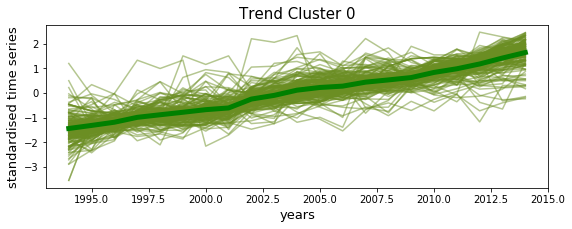

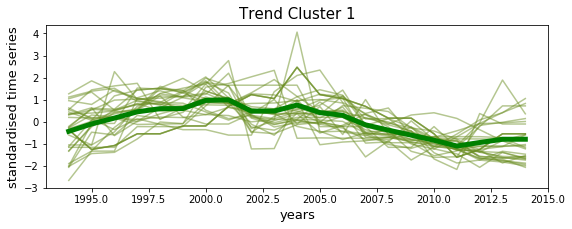

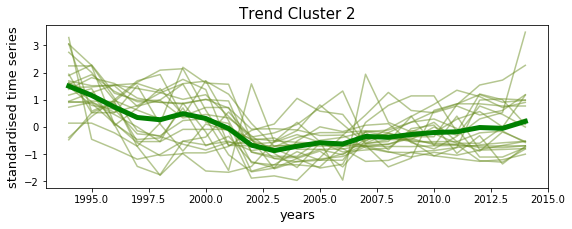

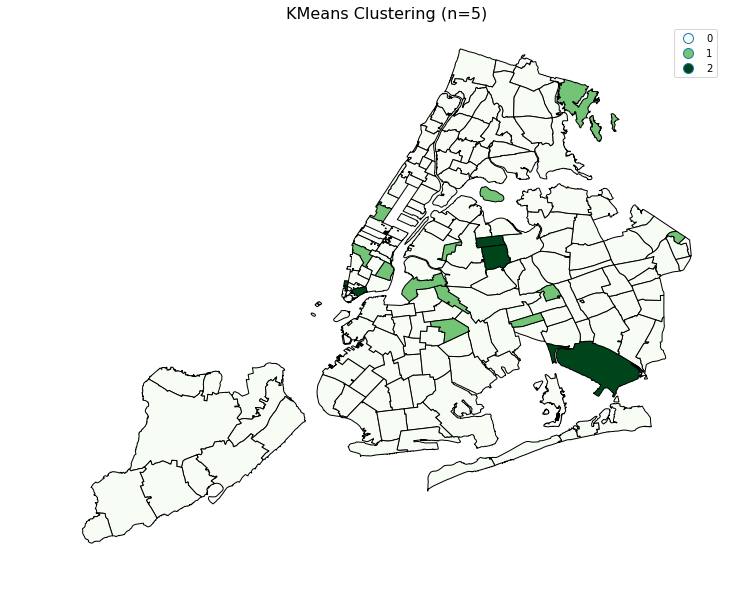

In [414]:
for i in range(len(km3.cluster_centers_)):
    fig = plt.figure(figsize=(9,3))
    ax = fig.add_subplot(111)
    ax.set_title('Trend Cluster %i' %i, fontsize=15)
    ax.set_ylabel('standardised time series', fontsize=13)
    ax.set_xlabel('years', fontsize=13)
    for j in range(len(cbbtsshp[cbbtsshp['km3'] == i])):
        ax.plot(cbbtsshp[cbbtsshp['km3'] == i].iloc[:,1:22].iloc[j], color='olivedrab', alpha=0.5)
    plt.plot(years, list(km3.cluster_centers_[i]), color='green', linewidth=5)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
cbbtsshp.plot('km3', legend=True, cmap='Greens', edgecolor='black', ax=ax, categorical=True)
ax.set_axis_off()
ax.set_title('KMeans Clustering (n=5)', fontsize=16)

**Figure 1**: Trend plots of zipcodes grouped by clusters with the cluster mean plotted, and a choropleth of 3 clusters (of trends in number of establishments over time) in New York City. This map does not seem to be very informative, so we should opt for a higher number of clusters.

Text(0.5,1,'KMeans Clustering (n=5)')

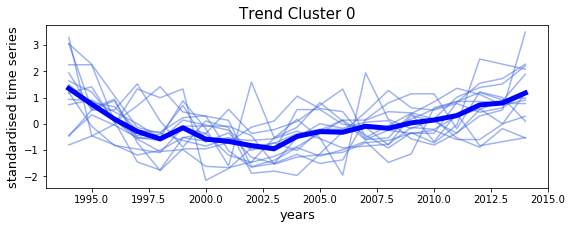

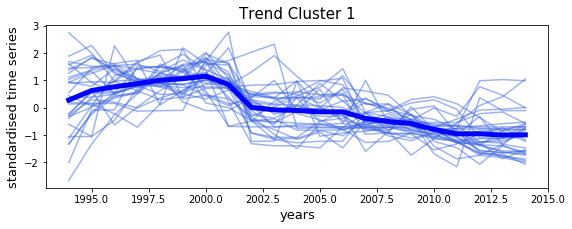

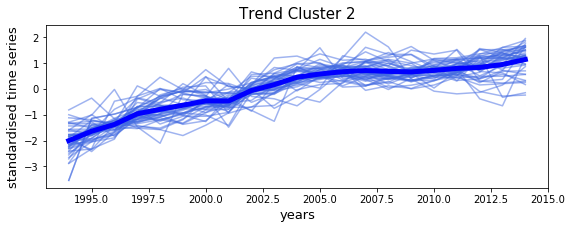

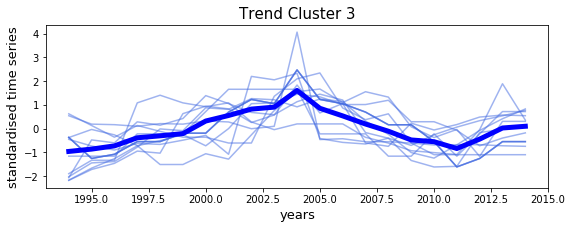

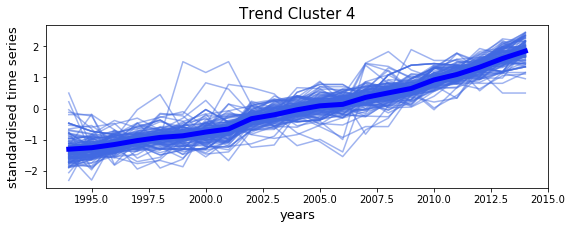

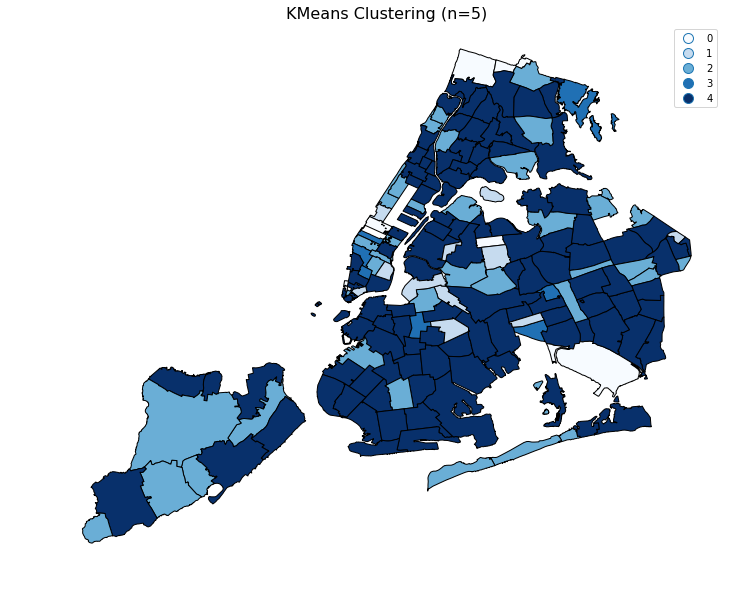

In [415]:
for i in range(len(km5.cluster_centers_)):
    fig = plt.figure(figsize=(9,3))
    ax = fig.add_subplot(111)
    ax.set_title('Trend Cluster %i' %i, fontsize=15)
    ax.set_ylabel('standardised time series', fontsize=13)
    ax.set_xlabel('years', fontsize=13)
    for j in range(len(cbbtsshp[cbbtsshp['km5'] == i])):
        ax.plot(cbbtsshp[cbbtsshp['km5'] == i].iloc[:,1:22].iloc[j], color='royalblue', alpha=0.5)
    plt.plot(years, list(km5.cluster_centers_[i]), color='blue', linewidth=5)
    
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
cbbtsshp.plot('km5', legend=True, cmap='Blues', edgecolor='black', ax=ax, categorical=True)
ax.set_axis_off()
ax.set_title('KMeans Clustering (n=5)', fontsize=16)

**Figure 2**: Trend plots of zipcodes grouped by clusters with the cluster mean plotted, and a choropleth of 5 clusters (of trends in number of establishments over time) in New York City. This map looks better than the previous one! However, from the trend plots, it seems like there are more clusters to be found in clusters 0, 1, and 4.

Text(0.5,1,'KMeans Clustering (n=7)')

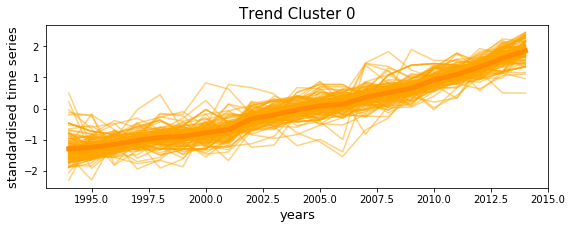

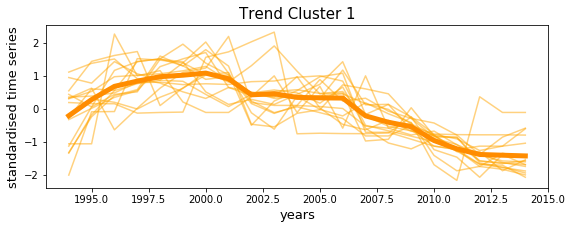

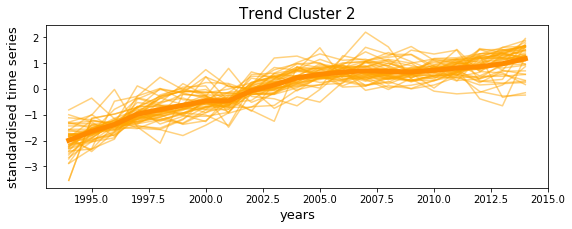

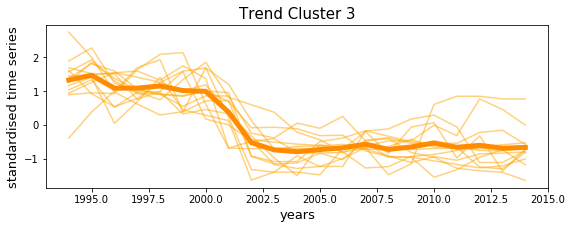

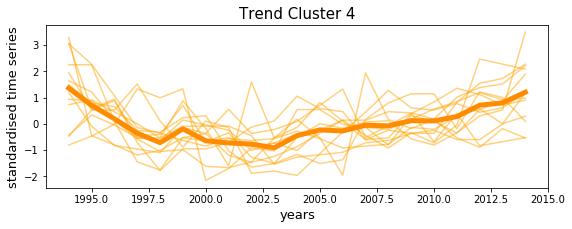

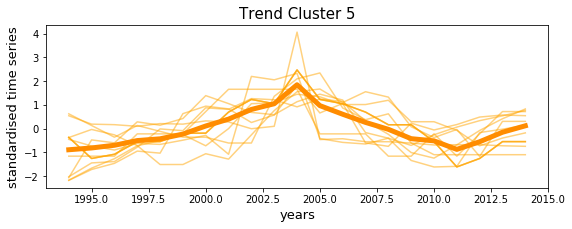

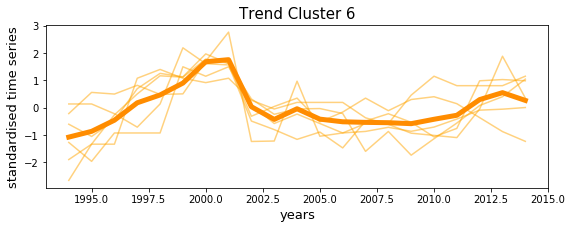

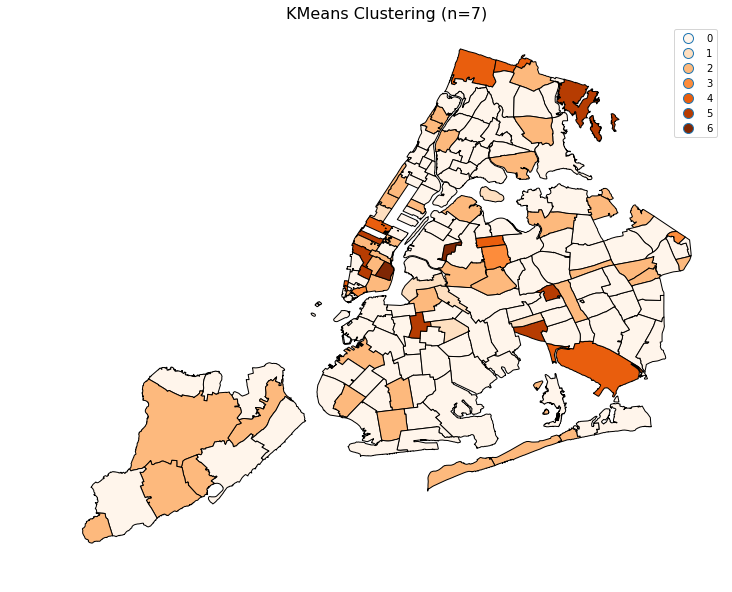

In [417]:
for i in range(len(km7.cluster_centers_)):
    fig = plt.figure(figsize=(9,3))
    ax = fig.add_subplot(111)
    ax.set_title('Trend Cluster %i' %i, fontsize=15)
    ax.set_ylabel('standardised time series', fontsize=13)
    ax.set_xlabel('years', fontsize=13)
    for j in range(len(cbbtsshp[cbbtsshp['km7'] == i])):
        ax.plot(cbbtsshp[cbbtsshp['km7'] == i].iloc[:,1:22].iloc[j], color='orange', alpha=0.5)
    plt.plot(years, list(km7.cluster_centers_[i]), color='darkorange', linewidth=5)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
cbbtsshp.plot('km7', legend=True, cmap='Oranges', edgecolor='black', ax=ax, categorical=True)
ax.set_axis_off()
ax.set_title('KMeans Clustering (n=7)', fontsize=16)

**Figure 3**: Trend plots of zipcodes grouped by clusters with the cluster mean plotted, and a choropleth of 7 clusters (of trends in number of establishments over time) in New York City. This map is the most informative out of all three (as is expected when the number of clusters are increased), but choosing 7 clusters may not necessarily be the best. Looking at the individual trend plots, we can see that cluster 6 only explains 6 zipcodes, it might not be necessary to have so many clusters.

## Plotting Hierarchical Clustering:

Text(0.5,1,'Hierarchical Clustering')

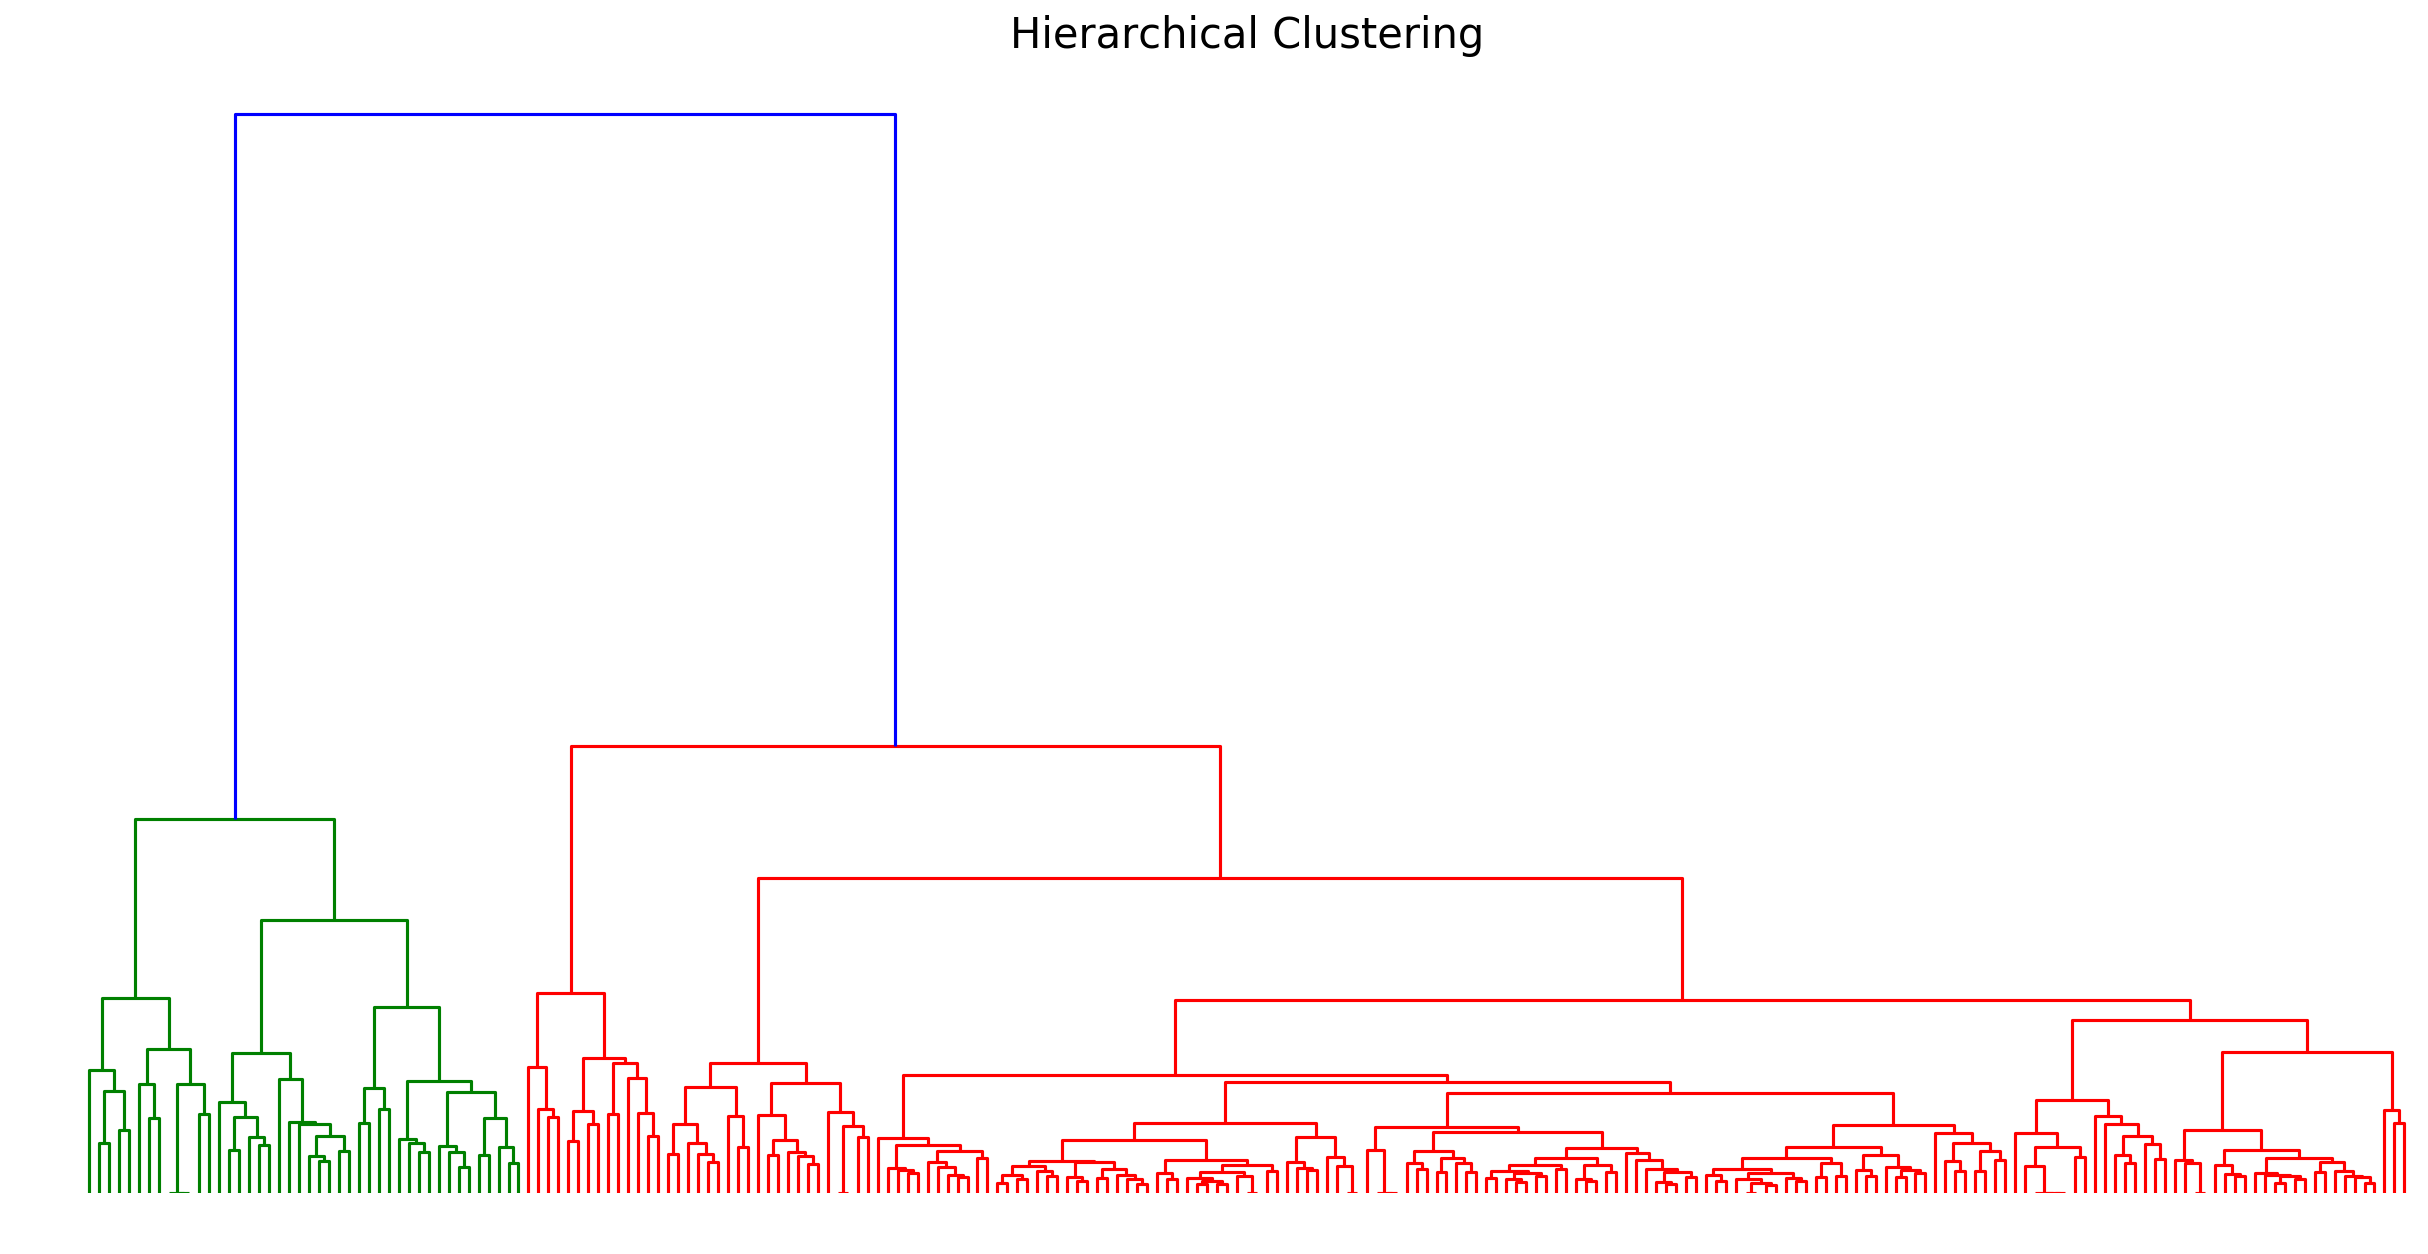

In [424]:
import scipy.cluster as scp
fig = plt.figure(figsize=(20,10), dpi=150)
ax = fig.add_subplot(111)
plt.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(cbbtsshp.iloc[:,1:22], method='ward'),
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8.)  # font size for the x axis labels)
ax.set_axis_off()
ax.set_title('Hierarchical Clustering', fontsize=20)

**Figure 4**: The hierarchical clustering plot indicates that the optimal number of clusters to have is at least 6, however it really depends on what you want to find out from clustering.